In [1]:
import numpy as np
from scipy import stats
import networkx as nx
from networkx.algorithms import tree

In [ ]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 

## [Experiment 5 - fixed r_in = 0.8, and variating r_out from 0 to r_in. graph size is 40.](#exp5)

In [18]:
rs = get_rs_from_fixed_rin(r_in = 0.8, count_rout = 40)
rs.shape

(2, 40)

Generating graphs started


100%|██████████| 40/40 [02:14<00:00,  3.37s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


louvain complete
mst_cut_clustering started


100%|██████████| 40/40 [00:22<00:00,  1.77it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [00:57<00:00, 14.47s/it]


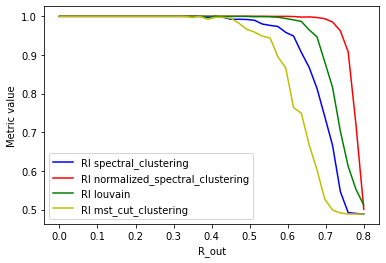

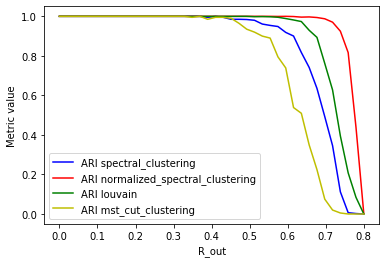

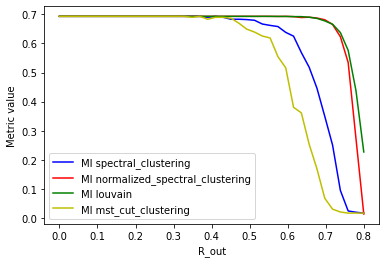

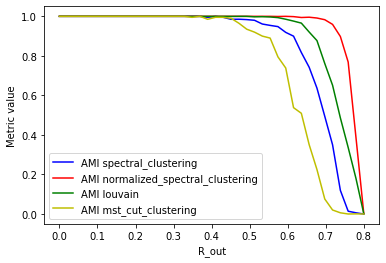

In [19]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=200)

metrics40 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df40 = metrics_to_df(metrics40, rs)
df40.to_csv('graph_40_r_in8_sample_40_repeates400')

Generating graphs started


100%|██████████| 40/40 [06:19<00:00,  9.48s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [01:10<00:00,  1.75s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [01:10<00:00,  1.75s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [01:48<00:00,  2.72s/it]


louvain complete
mst_cut_clustering started


100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


mst_cut_clustering complete


100%|██████████| 4/4 [02:41<00:00, 40.44s/it]


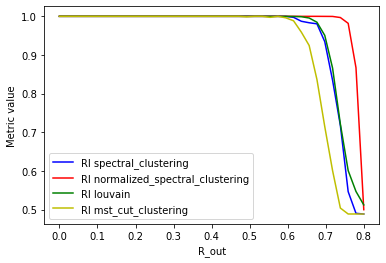

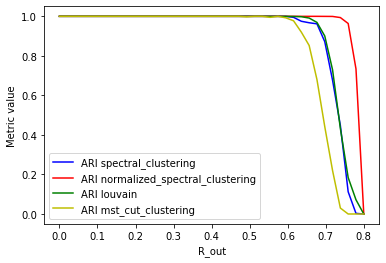

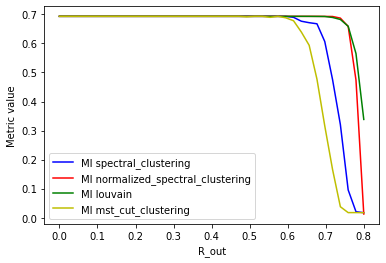

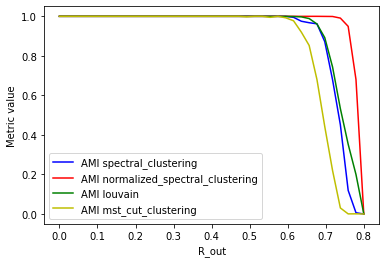

In [20]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 80,
    num_repeats=400)

metrics80 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df80 = metrics_to_df(metrics80, rs)
df80.to_csv('graph_40_r_in8_sample_80_repeates400')

Generating graphs started


100%|██████████| 40/40 [12:41<00:00, 19.03s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [01:03<00:00,  1.58s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [01:01<00:00,  1.53s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [01:11<00:00,  1.79s/it]


louvain complete
mst_cut_clustering started


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [01:51<00:00, 27.90s/it]


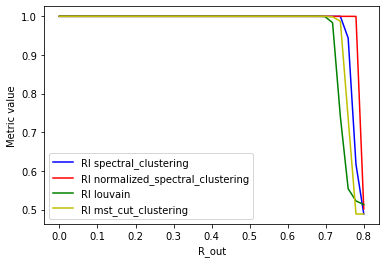

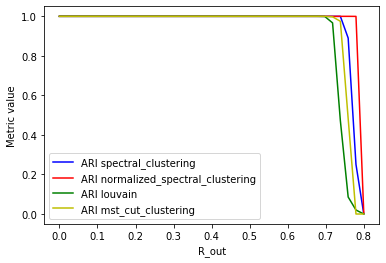

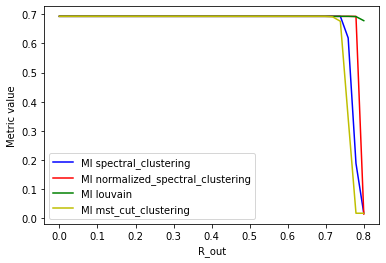

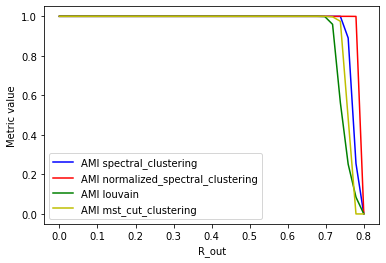

In [21]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 400,
    num_repeats=400)

metrics400 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df400 = metrics_to_df(metrics400, rs)
df400.to_csv('graph_40_r_in8_sample_400_repeates400')

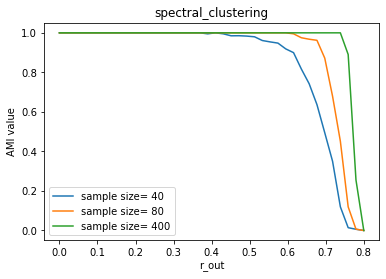

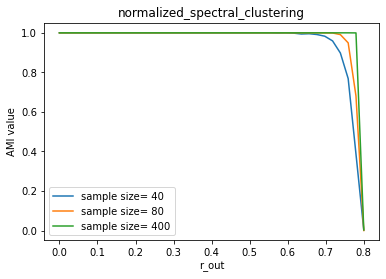

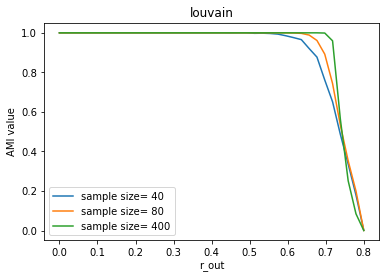

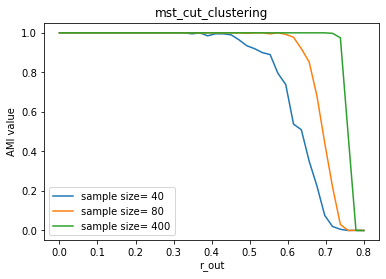

In [22]:
list(metrics40.keys())
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics40[algo][metric], metrics80[algo][metric], metrics400[algo][metric])), columns = ['r_out', 'sample size= 40', 'sample size= 80', 'sample size= 400']).set_index(['r_out'])
    df.plot(title=algo, ylabel = metric + ' value')

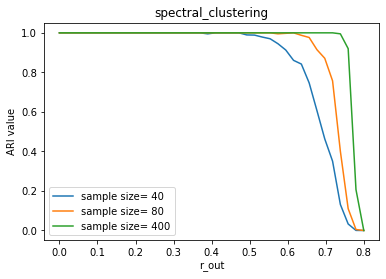

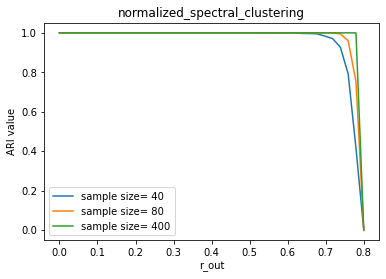

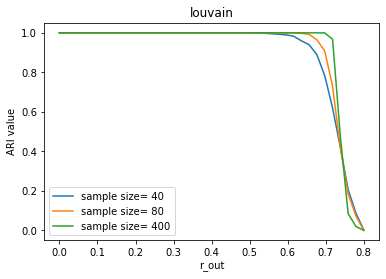

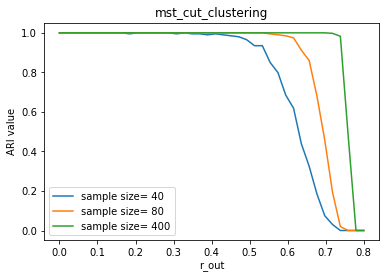

In [130]:
list(metrics40.keys())

for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics40[algo]['ARI'], metrics80[algo]['ARI'], metrics400[algo]['ARI'])), columns = ['r_out', 'sample size= 40', 'sample size= 80', 'sample size= 400']).set_index(['r_out'])
    df.plot(title=algo, ylabel = 'ARI value')